## The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.n this project, we will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not. We use Logistic Regression and Support Vector Machine to predict it

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

## Load Dataset

In [2]:
df = pd.read_csv('dataset/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## Data Cleaning

Identification of missing value

In [5]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

because the evaporation, sunshine, cloud9am, and cloud3pm columns have a lot of missing values, so I will drop of them

In [6]:
col = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(col, axis=1, inplace=True)

Filling the missing value from categorical columns with mode

In [7]:
categorical_col = []

for col in df.select_dtypes(include='object'):
    categorical_col.append(col)

categorical_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
for i in categorical_col:
    df[i].fillna(df[i].mode()[0], inplace=True)

Filling missing value from numerical columns with median

In [9]:
num_col = []

for col in df.select_dtypes(include='float64'):
    num_col.append(col)

num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
for i in num_col:
    df[i].fillna(df[i].median(), inplace=True)

In [11]:
df[num_col].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

I want make sure if there has no more missing value

In [12]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Because the date column is an object type, so I will make it a datetime type

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

## EDA

### 1. Distribution of Numerical Columns

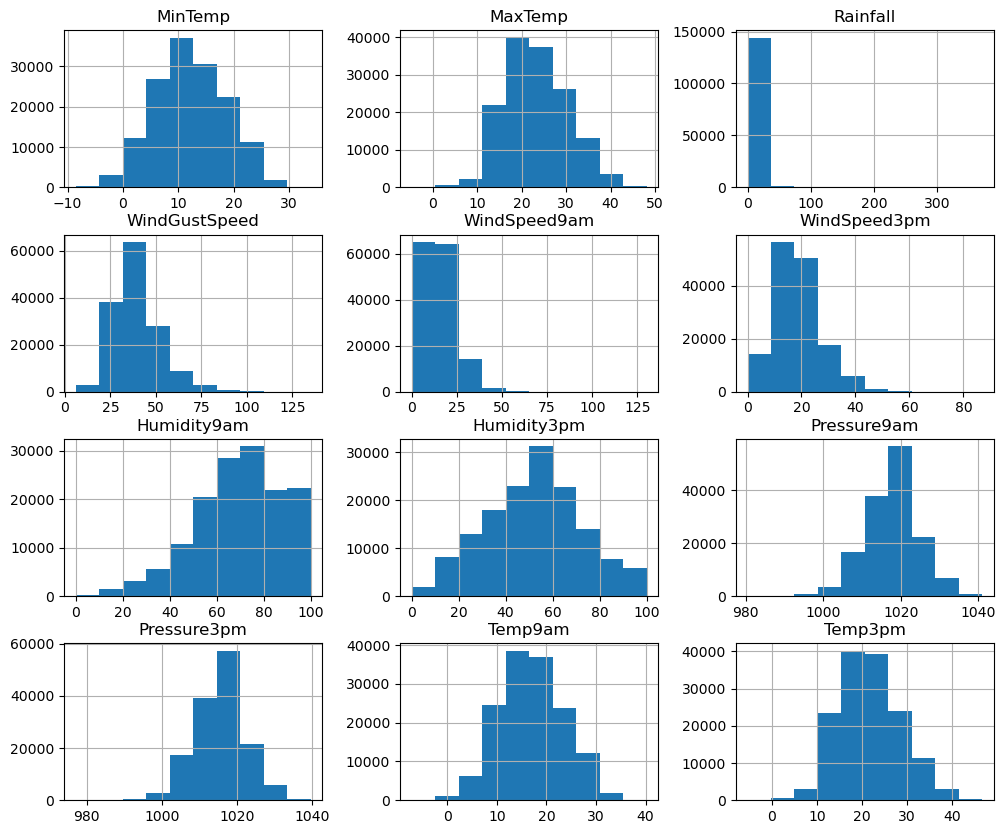

In [14]:
numeric_col = df.select_dtypes(include='float64').columns

df[numeric_col].hist(
    figsize=(12, 10)
)
plt.show()

### 2. Correlation between numerical columns

<Axes: >

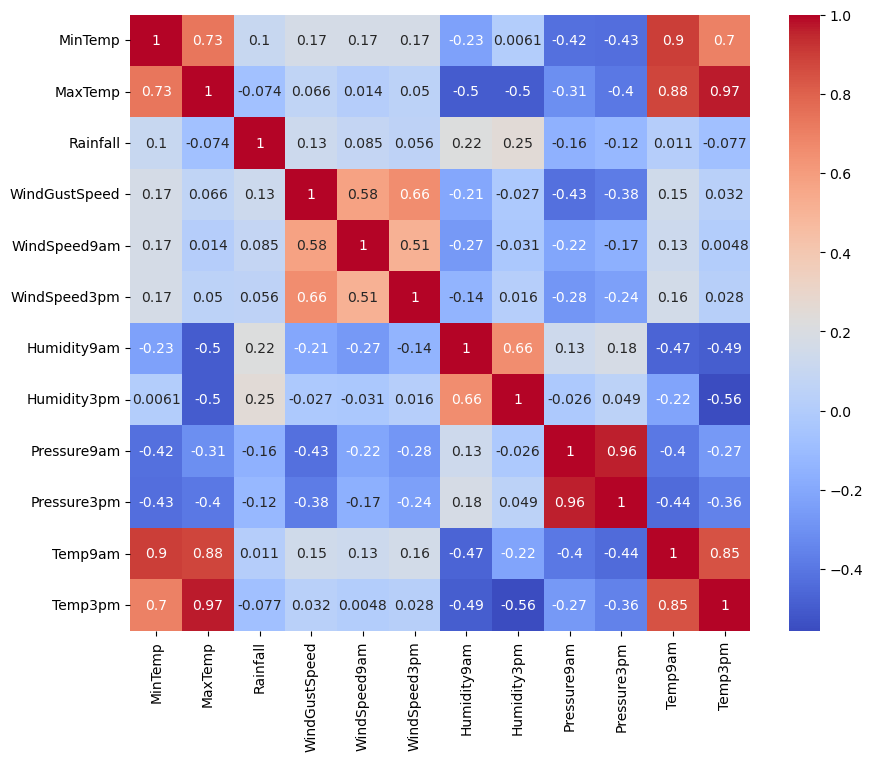

In [15]:
correlation_matrix = df[numeric_col].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm'
)

### 3. Analysis of wind columns

3.1 Wind Direction Distribution at 9am

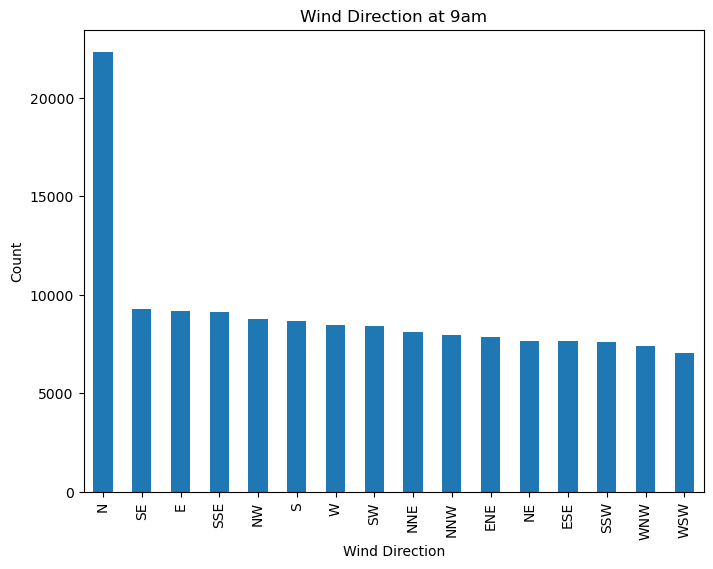

In [16]:
plt.figure(figsize=(8, 6))
df['WindDir9am'].value_counts().plot(kind='bar')
plt.title('Wind Direction at 9am')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

3.2 Wind Direction at 3pm

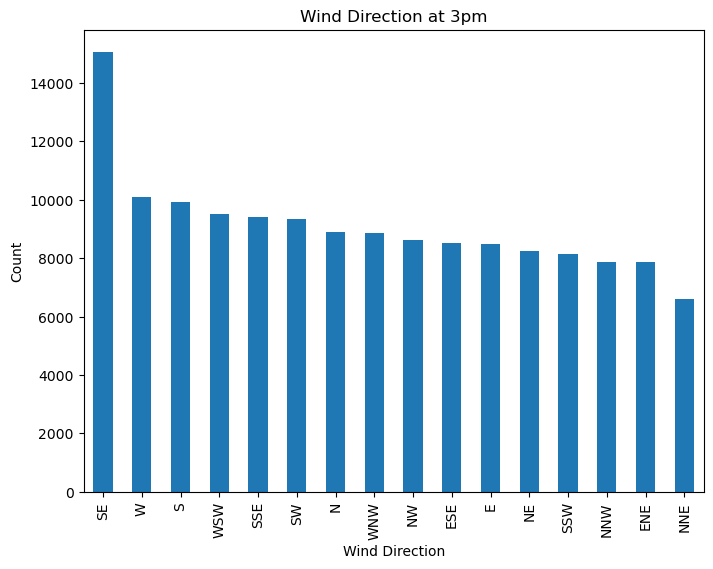

In [17]:
plt.figure(figsize=(8, 6))
df['WindDir3pm'].value_counts().plot(kind='bar')
plt.title('Wind Direction at 3pm')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

### 4. Monthly Rainfall Trends

In [18]:
# Set date column as Index
df.set_index('Date', inplace=True)

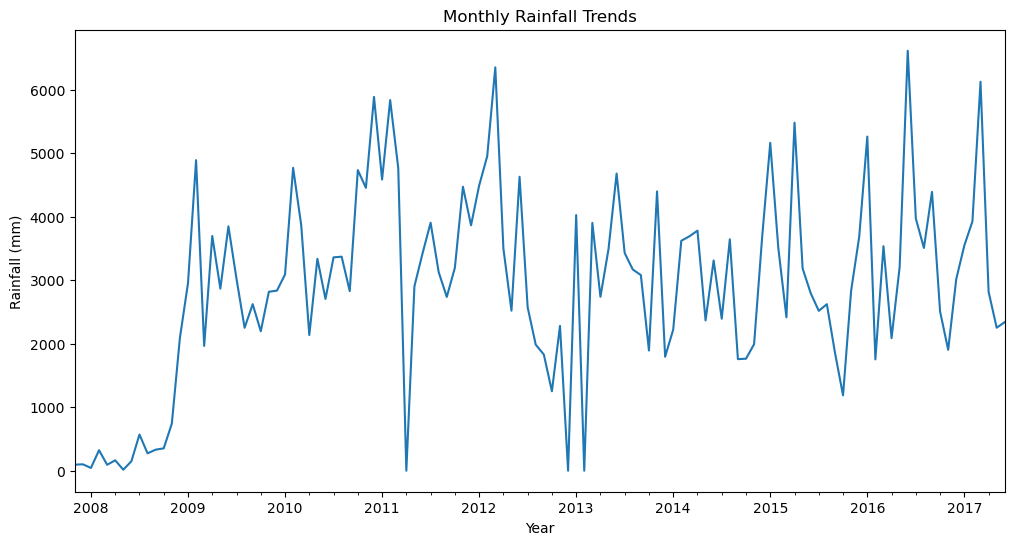

In [19]:
monthly_rainfall = df['Rainfall'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_rainfall.plot()
plt.title('Monthly Rainfall Trends')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

### 5. Count Rain Today

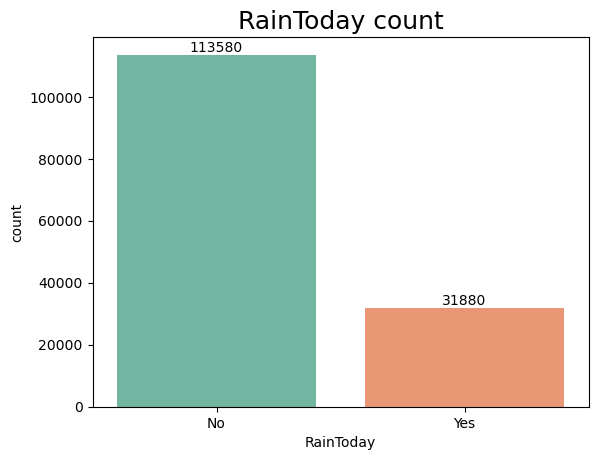

In [21]:
ax = sns.countplot(x ='RainToday',data=df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.title('RainToday count', fontsize=18)
plt.show()

## Data Prepocessing

In [22]:
# make new dataset
new_df = df.reset_index()
# drop date column
new_df.drop('Date', axis=1, inplace=True)

### 1. Declare feature and target variabels

In [23]:
X = new_df.drop('RainTomorrow', axis=1)
y = new_df['RainTomorrow']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

### 2. Encode Categorical columns

In [26]:
X_train = pd.concat(
    [
        X_train[numerical],
        pd.get_dummies(X_train[categorical])
    ], axis=1
)

In [27]:
X_test = pd.concat(
    [
        X_test[numerical],
        pd.get_dummies(X_test[categorical])
    ], axis=1
)

### 3. Feature Scaling

In [28]:
cols = X_train.columns

In [29]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

## Modeling

### 1. Logistic Regression

In [31]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8470


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.73      0.48      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.84      0.85      0.83     29092



### 2. Support Vector Machine

Because using one hot encode will cause a lot of column increments, so I will try use label encoder to encode features to build a support vector machine model

In [33]:
label_encoders = {}
for column in new_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])

In [34]:
X = new_df.drop(columns=['RainTomorrow'])
y = new_df['RainTomorrow']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [37]:
model = SVC()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8450


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     22726
           1       0.78      0.41      0.54      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.69      0.72     29092
weighted avg       0.84      0.85      0.83     29092



## We got our Logistic regression model with accuracy 84,7% and SVM model with accuracy 84,5% based on our data which is Rain in Australia